In [1]:
import os
os.chdir("..")

import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import ks_2samp

In [3]:
def p_value_string(p_value):
    string_list = ["-", "*", "**", "***"]
    p_value_th_list = [0.05, 0.01, 0.001, 0]
    for p_str, p_th in zip(string_list, p_value_th_list):
        if p_value >= p_th:
            return p_str

In [4]:
metrics_skm_list = ["accuracy", "kappa", "f1_score"]
dataset_list = ["Adult", "Maternal", "Titanic", "Wisconsin", "WineQuality", "StudentDropout"]

In [5]:
result_file_list = os.listdir("Results/")

# ML distinguish between Real and Generated data

Adult


,model_name,accuracy,kappa,f1_score
0,LinearNN-iqr-covmat-integral,0.627600,0.255841,0.606031
1,SDV-TVAESynthesizer,0.637304,0.275019,0.611882
2,LinearNN-both-loss_iqr-covmat-integral,0.690762,0.381780,0.699350
3,SDV-CTGANSynthesizer,0.725833,0.451417,0.727582
4,SDV-CopulaGANSynthesizer,0.989275,0.978509,0.989158
5,SDV-GaussianCopulaSynthesizer,0.990617,0.981197,0.990516
6,LinearNN-BCELoss,0.998288,0.996569,0.998270
7,CNN1D-BCELoss,0.998617,0.997228,0.998615
8,CNN1D-iqr-covmat-integral,0.998754,0.997503,0.998750
9,CNN1D-both-loss_iqr-covmat-integral,0.998871,0.997737,0.998866


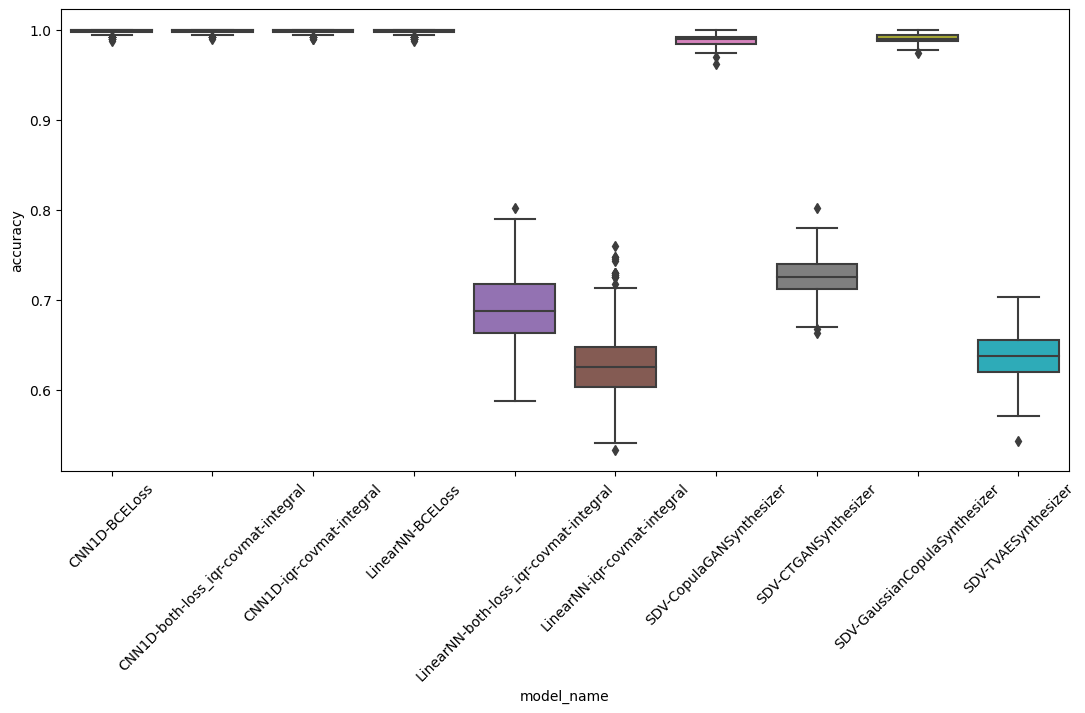

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,-,-,*,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,-,-,-,***,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,-,-,-,**,***,***,***,***,***,***
LinearNN-BCELoss,*,***,**,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,***,***,***,***,***,-


Maternal


,model_name,accuracy,kappa,f1_score
0,LinearNN-both-loss_iqr-covmat-integral,0.582734,0.167811,0.570636
1,SDV-TVAESynthesizer,0.588856,0.179746,0.570182
2,SDV-GaussianCopulaSynthesizer,0.589572,0.181629,0.593584
3,LinearNN-iqr-covmat-integral,0.596613,0.195662,0.590682
4,SDV-CTGANSynthesizer,0.620036,0.240935,0.629421
5,SDV-CopulaGANSynthesizer,0.685913,0.371632,0.681985
6,CNN1D-iqr-covmat-integral,0.945209,0.890035,0.944699
7,LinearNN-BCELoss,0.974655,0.949139,0.974129
8,CNN1D-both-loss_iqr-covmat-integral,0.976356,0.952526,0.975856
9,CNN1D-BCELoss,0.986596,0.973100,0.986485


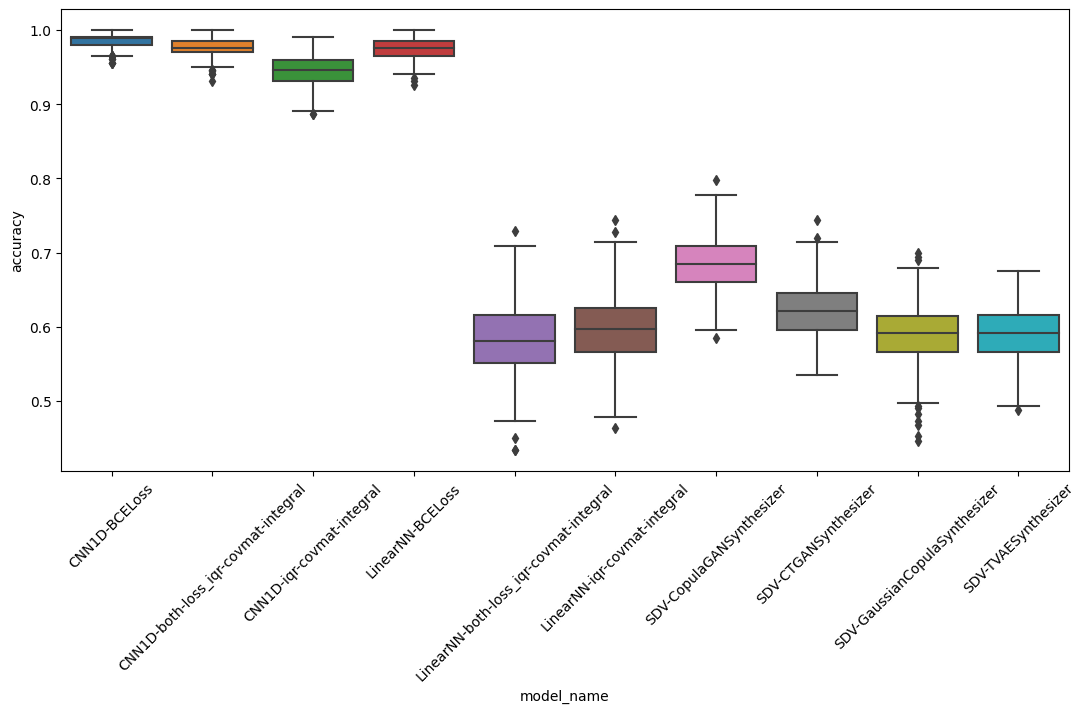

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,***,***,***,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,***,-,***,-,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,***,***,-,***,***,***,***,***,***,***
LinearNN-BCELoss,***,-,***,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,-
SDV-TVAESynthesizer,***,***,***,***,***,***,***,***,-,-


Titanic


,model_name,accuracy,kappa,f1_score
0,SDV-GaussianCopulaSynthesizer,0.521437,0.049763,0.521877
1,LinearNN-iqr-covmat-integral,0.562598,0.131049,0.553539
2,LinearNN-both-loss_iqr-covmat-integral,0.595109,0.192615,0.587070
3,SDV-CopulaGANSynthesizer,0.644674,0.290374,0.641052
4,SDV-TVAESynthesizer,0.649144,0.298831,0.638287
5,SDV-CTGANSynthesizer,0.768533,0.536173,0.772290
6,LinearNN-BCELoss,0.994117,0.988170,0.994047
7,CNN1D-both-loss_iqr-covmat-integral,0.996126,0.992204,0.996084
8,CNN1D-BCELoss,0.996172,0.992306,0.996124
9,CNN1D-iqr-covmat-integral,0.996931,0.993828,0.996900


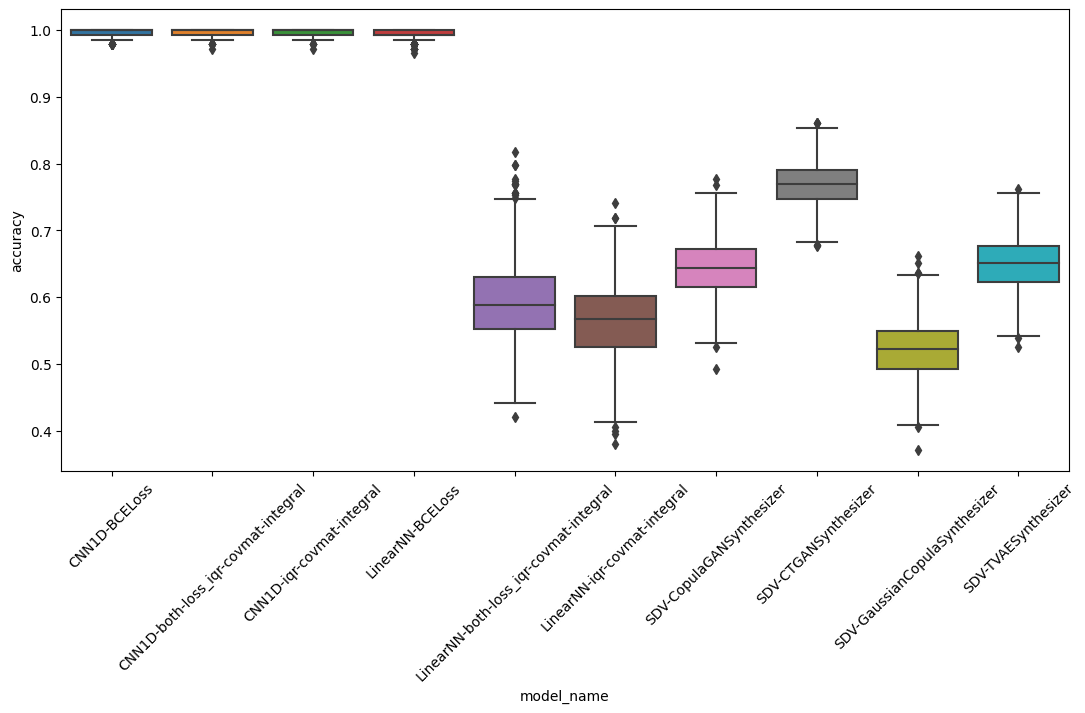

,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,LinearNN-BCELoss,LinearNN-both-loss_iqr-covmat-integral,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
CNN1D-BCELoss,-,-,-,***,***,***,***,***,***,***
CNN1D-both-loss_iqr-covmat-integral,-,-,*,***,***,***,***,***,***,***
CNN1D-iqr-covmat-integral,-,*,-,***,***,***,***,***,***,***
LinearNN-BCELoss,***,***,***,-,***,***,***,***,***,***
LinearNN-both-loss_iqr-covmat-integral,***,***,***,***,-,***,***,***,***,***
LinearNN-iqr-covmat-integral,***,***,***,***,***,-,***,***,***,***
SDV-CopulaGANSynthesizer,***,***,***,***,***,***,-,***,***,-
SDV-CTGANSynthesizer,***,***,***,***,***,***,***,-,***,***
SDV-GaussianCopulaSynthesizer,***,***,***,***,***,***,***,***,-,***
SDV-TVAESynthesizer,***,***,***,***,***,***,-,***,***,-


Wisconsin
WineQuality
StudentDropout


,model_name,accuracy,kappa,f1_score
0,SDV-TVAESynthesizer,0.652475,0.305335,0.624744
1,SDV-CTGANSynthesizer,0.657321,0.314842,0.656306
2,SDV-CopulaGANSynthesizer,0.998996,0.997987,0.998996
3,SDV-GaussianCopulaSynthesizer,0.999846,0.999691,0.999845
4,LinearNN-BCELoss,0.999971,0.999942,0.999971


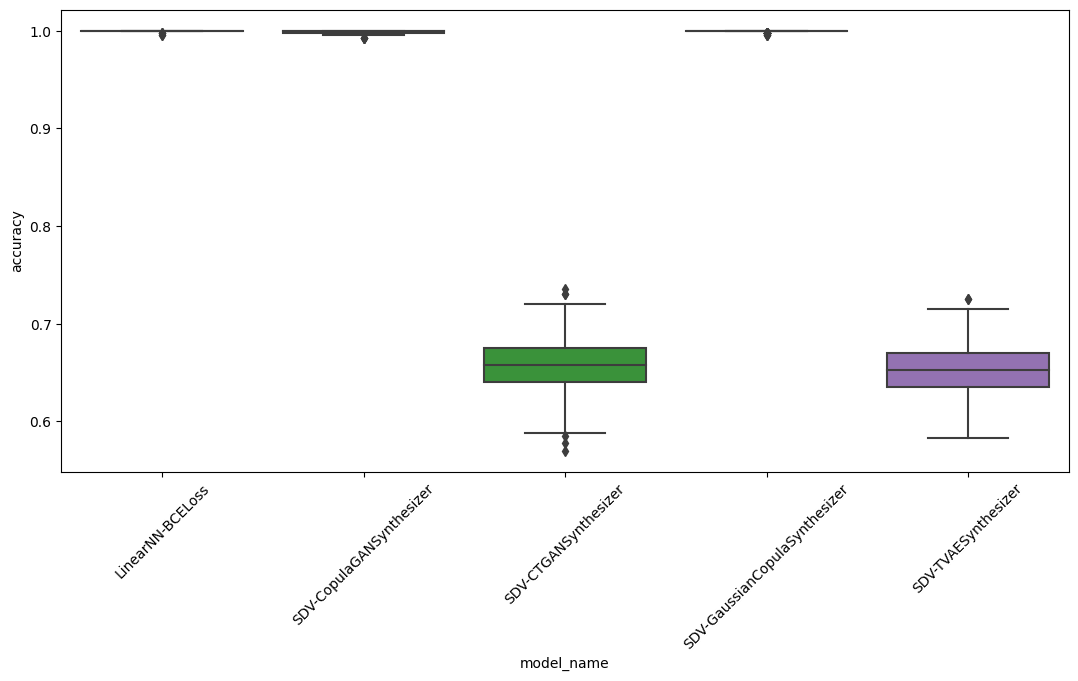

,LinearNN-BCELoss,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,SDV-GaussianCopulaSynthesizer,SDV-TVAESynthesizer
LinearNN-BCELoss,-,***,***,-,***
SDV-CopulaGANSynthesizer,***,-,***,***,***
SDV-CTGANSynthesizer,***,***,-,***,**
SDV-GaussianCopulaSynthesizer,-,***,***,-,***
SDV-TVAESynthesizer,***,***,**,***,-


In [6]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)

    distribution_list = []
    help_list = []
    for k, v in result_load_dict.items():
        
        df_res_ml = v.get("ml_difference_real_generated_data")
        
        if df_res_ml is None:
            continue
        
        if not any([metric in df_res_ml.columns for metric in metrics_skm_list]):
            continue
        
        model_name = "_".join(k.split("_")[2:])
        dict_help = {"model_name": model_name}
        dict_help.update(
            {k: v for k, v in df_res_ml[metrics_skm_list].mean().to_dict().items()}
        )
        help_list.append(dict_help)
        
        df_res_ml["model_name"] = model_name
        distribution_list.append(df_res_ml)

    if len(distribution_list) == 0:
        continue
    
    df_dist = pd.concat(distribution_list, ignore_index=True)
    
    df_result_summary = pd.DataFrame(help_list).sort_values("accuracy").reset_index(drop=True)
    display(df_result_summary)
    
    plt.figure(figsize=(13, 6))
    sns.boxplot(data=df_dist, x="model_name", y="accuracy")
    plt.xticks(rotation=45)
    plt.show()
    
    model_tuple_list = []
    for i, m_name_i in enumerate(df_dist["model_name"].unique()[:-1]):
        for m_name_j in df_dist["model_name"].unique()[(i+1):]:
            model_tuple_list.append([m_name_i, m_name_j])

    p_value_matrix = pd.DataFrame("-", index=df_dist["model_name"].unique(), columns=df_dist["model_name"].unique())

    for model1, model2 in model_tuple_list:
        metric = "accuracy"
        value_model1 = df_dist[df_dist["model_name"] == model1][metric].values
        value_model2 = df_dist[df_dist["model_name"] == model2][metric].values
        
        _, p_value = ks_2samp(value_model1, value_model2)
        
        p_value_matrix.loc[model1, model2] = p_value_string(p_value)
        p_value_matrix.loc[model2, model1] = p_value_string(p_value)

    display(p_value_matrix)

# ML Training with Real and Generated data

In [7]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)
    
    help_list = []
    for k, v in result_load_dict.items():
        df_res_ml = v.get("ml_train_model_comparison", None)
        
        if df_res_ml is None:
            continue
        
        dict_help = {"model_name": "_".join(k.split("_")[2:])}
        dict_help.update(
            {k: v for k, v in df_res_ml.mean().to_dict().items()}
        )
        help_list.append(dict_help)

    if len(help_list) == 0:
        continue
    
    df_result_summary = pd.DataFrame(help_list).sort_values("accuracy_train_realgen_test_real", ascending=False).reset_index(drop=True)
    display(df_result_summary.T)

Adult


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,LinearNN-iqr-covmat-integral,LinearNN-BCELoss,CNN1D-both-loss_iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,CNN1D-BCELoss,SDV-CTGANSynthesizer,CNN1D-iqr-covmat-integral,LinearNN-both-loss_iqr-covmat-integral,SDV-CopulaGANSynthesizer
accuracy_train_real_test_real,0.821058,0.824733,0.828,0.820208,0.8212,0.825533,0.817917,0.816708,0.824775,0.822642
kappa_train_real_test_real,0.450989,0.457579,0.476349,0.442596,0.446731,0.455212,0.440625,0.432114,0.445505,0.448364
f1_score_train_real_test_real,0.557067,0.561478,0.579568,0.548202,0.552432,0.557199,0.548186,0.538666,0.547585,0.552649
accuracy_train_realgen_test_real,0.789142,0.788758,0.78815,0.787767,0.787558,0.786808,0.785475,0.783817,0.783375,0.775875
kappa_train_realgen_test_real,0.427546,0.382009,0.349655,0.363704,0.286229,0.33287,0.250404,0.381501,0.328281,0.212976
f1_score_train_realgen_test_real,0.56605,0.514482,0.474235,0.492873,0.390686,0.456595,0.338995,0.518552,0.45698,0.306941
accuracy_train_gen_test_real,0.741283,0.689975,0.764325,0.765058,0.762933,NaN,0.750267,0.715892,0.704483,0.760467
kappa_train_gen_test_real,0.371381,0.148457,0.04646,0.086755,0.097516,NaN,0.015781,0.254197,0.222075,0.008668
f1_score_train_gen_test_real,0.546005,0.350889,0.059962,0.129249,0.163453,NaN,0.045315,0.434148,0.417467,0.014228


Maternal


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,LinearNN-both-loss_iqr-covmat-integral,LinearNN-BCELoss,SDV-GaussianCopulaSynthesizer,CNN1D-BCELoss,LinearNN-iqr-covmat-integral,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral
accuracy_train_real_test_real,0.862399,0.861651,0.858626,0.856149,0.858779,0.862093,0.856364,0.861236,0.848911,0.857359
kappa_train_real_test_real,0.6073,0.6035,0.5996,0.586736,0.600962,0.618403,0.597049,0.608296,0.576642,0.60229
f1_score_train_real_test_real,0.693384,0.689286,0.687671,0.675632,0.689066,0.705943,0.686708,0.694902,0.671547,0.692176
accuracy_train_realgen_test_real,0.855269,0.852218,0.846585,0.845109,0.828766,0.80734,0.803388,0.795234,0.794428,0.785491
kappa_train_realgen_test_real,0.598973,0.573883,0.578281,0.532182,0.512122,0.504305,0.374563,0.314691,0.39217,0.334693
f1_score_train_realgen_test_real,0.692468,0.66449,0.677354,0.620351,0.616882,0.634663,0.459653,0.386965,0.507464,0.43945
accuracy_train_gen_test_real,0.80743,0.841636,0.720994,0.82144,NaN,0.770228,0.72889,0.732831,NaN,NaN
kappa_train_gen_test_real,0.491268,0.546682,0.432619,0.429388,NaN,0.435902,0.005397,-0.000147,NaN,NaN
f1_score_train_gen_test_real,0.619777,0.64361,0.622275,0.515738,NaN,0.595568,0.009898,0.00036,NaN,NaN


Titanic


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,SDV-GaussianCopulaSynthesizer,CNN1D-iqr-covmat-integral,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,LinearNN-BCELoss,SDV-CopulaGANSynthesizer,LinearNN-both-loss_iqr-covmat-integral,SDV-CTGANSynthesizer,LinearNN-iqr-covmat-integral
accuracy_train_real_test_real,0.78877,0.785629,0.794522,0.793595,0.788049,0.780683,0.790219,0.789596,0.788046,0.798485
kappa_train_real_test_real,0.550342,0.545181,0.568325,0.566648,0.553443,0.535188,0.552207,0.550888,0.549995,0.573425
f1_score_train_real_test_real,0.721481,0.718135,0.737865,0.738699,0.728598,0.714938,0.721288,0.720237,0.721619,0.739902
accuracy_train_gen_test_real,0.764045,0.782496,0.727157,0.589204,0.700148,0.626358,0.60249,0.652228,0.602537,0.498888
kappa_train_gen_test_real,0.511464,0.525764,0.460049,0.227509,0.333045,0.096528,0.007423,0.245791,0.013104,-0.022694
f1_score_train_gen_test_real,0.713511,0.687526,0.70861,0.617495,0.522825,0.165664,0.01801,0.506034,0.025572,0.408091
accuracy_train_realgen_test_real,0.783899,0.782503,0.77428,0.773593,0.770792,0.767206,0.745773,0.734534,0.698667,0.66688
kappa_train_realgen_test_real,0.542717,0.531808,0.531956,0.526762,0.52033,0.507282,0.426005,0.424167,0.296932,0.292399
f1_score_train_realgen_test_real,0.720684,0.7008,0.724786,0.716975,0.711628,0.69744,0.588614,0.626809,0.437807,0.559123


Wisconsin
WineQuality
StudentDropout


,0,1,2,3,4
model_name,LinearNN-BCELoss,SDV-GaussianCopulaSynthesizer,SDV-CopulaGANSynthesizer,SDV-TVAESynthesizer,SDV-CTGANSynthesizer
accuracy_train_real_test_real,0.735283,0.738808,0.740533,0.7394,0.74065
kappa_train_real_test_real,0.255884,0.264842,0.274468,0.267515,0.269809
f1_score_train_real_test_real,0.40018,0.407313,0.417911,0.41046,0.412681
accuracy_train_gen_test_real,0.544367,0.702075,0.7018,0.652542,0.651033
kappa_train_gen_test_real,0.107196,0.073646,-0.000467,0.234612,0.046046
f1_score_train_gen_test_real,0.397042,0.154834,0.007651,0.490699,0.240161
accuracy_train_realgen_test_real,0.718775,0.718592,0.712867,0.708158,0.706483
kappa_train_realgen_test_real,0.248705,0.200321,0.175811,0.279727,0.186887
f1_score_train_realgen_test_real,0.421425,0.345606,0.316639,0.481293,0.351061


# Statistical analysis for generated data

In [8]:
for data_name in dataset_list:
    selected_files = [f for f in result_file_list if data_name in f]

    result_load_dict = {}
    for file_name in selected_files:
        with open(f"Results/{file_name}", 'rb') as f:
            result_load_dict.update({file_name.split(".")[0]: pickle.load(f)})

    print(data_name)
    
    help_list = []
    for k, v in result_load_dict.items():
        df_res_ml = v.get("check_statistics", None)
        
        if df_res_ml is None:
            continue
        
        dict_help = {"model_name": "_".join(k.split("_")[2:])}
        dict_help.update(
            {k: v for k, v in df_res_ml.mean().to_dict().items()}
        )
        help_list.append(dict_help)

    if len(help_list) == 0:
        continue
    
    df_result_summary = pd.DataFrame(help_list).sort_values("mean_SDV_QR_score", ascending=False).reset_index(drop=True)
    display(df_result_summary.T)

Adult


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,SDV-GaussianCopulaSynthesizer,SDV-CopulaGANSynthesizer,SDV-CTGANSynthesizer,LinearNN-iqr-covmat-integral,LinearNN-both-loss_iqr-covmat-integral,LinearNN-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,CNN1D-BCELoss
up_05_pvalue_Age,0.0,0.933333,0.0,0.366667,0.033333,0.133333,0.0,0.0,0.0,0.0
up_05_pvalue_Final Weight,0.433333,0.966667,0.0,0.0,0.166667,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_Education Number,0.966667,0.0,0.0,0.0,0.0,0.366667,0.0,0.166667,0.433333,0.0
up_05_pvalue_Capital Gain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Capital Loss,0.0,0.0,0.966667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Hours Per Week,0.3,0.9,0.0,0.0,0.266667,0.7,0.0,0.0,0.0,0.0
up_05_pvalue_Work Class_numeric,0.066667,0.8,0.0,0.0,0.533333,0.466667,0.166667,0.0,0.0,0.0
up_05_pvalue_Education_numeric,0.966667,0.933333,0.3,0.966667,0.333333,0.533333,0.633333,0.0,0.0,0.0
up_05_pvalue_Marital Status_numeric,0.833333,0.933333,0.3,0.2,0.8,0.4,0.0,0.0,0.0,0.0


Maternal


,0,1,2,3,4,5,6,7,8,9
model_name,LinearNN-both-loss_iqr-covmat-integral,SDV-TVAESynthesizer,LinearNN-iqr-covmat-integral,SDV-GaussianCopulaSynthesizer,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,LinearNN-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral,CNN1D-BCELoss
up_05_pvalue_Age,0.933333,0.0,0.5,0.866667,1.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_SystolicBP,0.8,0.633333,0.3,0.933333,0.0,0.0,0.066667,0.0,0.0,0.0
up_05_pvalue_DiastolicBP,0.8,0.933333,0.466667,0.0,0.933333,0.0,0.366667,0.066667,0.0,0.666667
up_05_pvalue_BS,0.233333,0.0,0.9,0.0,0.0,0.1,0.0,0.0,0.0,0.0
up_05_pvalue_HeartRate,0.1,1.0,0.333333,0.966667,0.766667,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_BodyTemp_numeric,0.533333,0.433333,0.8,0.9,0.133333,0.0,0.3,0.0,0.0,0.0
up_05_pvalue_RiskLevel_numeric,0.433333,0.933333,0.466667,0.566667,0.0,0.266667,0.833333,0.0,0.0,0.0
mean_SDV_QR_score,0.886166,0.883529,0.878017,0.861676,0.834195,0.795292,0.744228,0.634238,0.61798,0.577004


Titanic


,0,1,2,3,4,5,6,7,8,9
model_name,SDV-TVAESynthesizer,SDV-GaussianCopulaSynthesizer,LinearNN-iqr-covmat-integral,SDV-CopulaGANSynthesizer,LinearNN-both-loss_iqr-covmat-integral,SDV-CTGANSynthesizer,LinearNN-BCELoss,CNN1D-BCELoss,CNN1D-both-loss_iqr-covmat-integral,CNN1D-iqr-covmat-integral
up_05_pvalue_Age,0.833333,0.966667,0.833333,0.0,0.533333,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Fare,0.266667,0.733333,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Pclass_numeric,0.333333,1.0,0.6,0.0,0.066667,0.0,0.933333,0.6,0.0,0.0
up_05_pvalue_Sex_numeric,0.733333,0.7,0.5,0.733333,0.333333,0.0,0.633333,0.766667,0.033333,0.0
up_05_pvalue_SibSp_numeric,0.133333,0.933333,0.866667,0.2,0.533333,0.0,0.166667,0.0,0.0,0.0
up_05_pvalue_Parch_numeric,0.966667,0.633333,0.6,0.0,0.333333,0.0,0.1,0.0,0.0,0.0
up_05_pvalue_Cabin_numeric,0.8,1.0,0.6,0.0,0.833333,0.2,0.366667,0.0,0.0,0.0
up_05_pvalue_Embarked_numeric,0.0,0.733333,0.433333,0.0,0.133333,0.266667,0.366667,0.966667,0.2,0.0
up_05_pvalue_Survived_numeric,0.766667,0.866667,0.566667,0.533333,0.366667,0.0,0.0,0.033333,0.0,0.0


Wisconsin
WineQuality
StudentDropout


,0,1,2,3,4
model_name,SDV-TVAESynthesizer,SDV-CTGANSynthesizer,SDV-CopulaGANSynthesizer,SDV-GaussianCopulaSynthesizer,LinearNN-BCELoss
up_05_pvalue_Application mode,0.6,0.0,0.0,0.0,0.0
up_05_pvalue_Application order,0.0,0.0,0.0,0.0,0.0
up_05_pvalue_Course,0.566667,0.0,0.0,0.0,0.0
up_05_pvalue_Daytime/evening attendance\t,0.166667,0.8,0.0,0.933333,0.0
up_05_pvalue_Previous qualification,0.0,0.633333,0.0,0.0,0.0
up_05_pvalue_Previous qualification (grade),0.733333,0.2,0.0,0.933333,0.0
up_05_pvalue_Nacionality,0.0,0.233333,0.866667,0.0,0.0
up_05_pvalue_Mother's qualification,0.766667,0.266667,0.0,0.0,0.033333
up_05_pvalue_Father's qualification,0.533333,0.2,0.166667,0.933333,0.866667
